In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [194]:
v = pd.read_csv('v201.csv')
v['crushdate'] = pd.to_datetime(v['crushdate'], infer_datetime_format=True)
v.tail()

,crushdate,year,month,pblk,avg_brix,tier,origin,long,lat,yesterday_ddays50,...,humidity_1,humidity_2,humidity_3,cloud_cover_1,cloud_cover_2,cloud_cover_3,maxtemp_1,maxtemp_2,maxtemp_3,time_diff
6098,2014-09-17,2014,9,138553,25.471429,VAL,CAL,-8469.2237,2653.3059,24.03,...,4.985406,56.870290,-0.058875,47.576303,-6.902911,-7.489102,6729.152438,5.386410,-0.172832,78
6099,2014-09-18,2014,9,102722,23.533333,OAK,LDT,-8506.0542,2681.2464,22.29,...,5.213777,58.821047,1.169062,54.530384,-17.834420,-14.386652,6644.170037,9.770275,1.167371,79
6100,2014-09-18,2014,9,131157,26.166667,VAL,CAL,-8475.6392,2657.1293,24.57,...,5.043957,57.186324,0.197274,46.818752,-11.441350,-9.490292,6714.229281,3.716271,-3.304802,79
6101,2014-09-18,2014,9,133581,27.275000,OAK,LDT,-8507.8084,2685.4520,23.02,...,5.189385,58.561797,1.032702,54.900021,-17.776238,-17.790562,6661.151729,5.188015,-2.016810,79
6102,2014-09-18,2014,9,138553,24.934783,VAL,CAL,-8469.2237,2653.3059,25.37,...,4.985406,56.870290,-0.058875,47.576303,-6.902911,-7.489102,6729.152438,5.386410,-0.172832,79


In [195]:
lr_precip_intensity_adj = pd.read_csv('lr_precip_intensity_adj.csv')
v = pd.merge(v, lr_precip_intensity_adj, how="left", on='pblk')

lr_dew_point = pd.read_csv('lr_dew_point.csv')
v = pd.merge(v, lr_dew_point, how="left", on='pblk')

lr_wind_speed = pd.read_csv('lr_wind_speed.csv')
v = pd.merge(v, lr_wind_speed, how="left", on='pblk')

In [196]:
v.head()

,crushdate,year,month,pblk,avg_brix,tier,origin,long,lat,yesterday_ddays50,...,time_diff,precip_intensity_adj_1,precip_intensity_adj_2,precip_intensity_adj_3,dew_point_1,dew_point_2,dew_point_3,wind_speed_1,wind_speed_2,wind_speed_3
0,2001-08-11,2001,8,100094,22.900000,TLV,CAL,-8493.8518,2666.9468,20.11,...,41,12.407639,-2.707115,-0.700358,4125.090376,0.183495,-5.211436,515.986046,-222.910464,-73.488280
1,2001-08-11,2001,8,101177,23.200000,TLV,CAL,-8493.5375,2669.7853,20.81,...,41,12.999425,-3.264817,-0.098989,4128.209953,0.143645,-4.695178,503.338956,-215.340856,-73.222532
2,2001-08-11,2001,8,101545,22.571429,EJG,CAL,-8472.4521,2634.5172,22.42,...,41,10.235580,0.220781,-2.983798,4076.917825,-1.284886,-6.337803,515.317135,-236.107200,-65.948627
3,2001-08-11,2001,8,101669,21.675000,EJG,CAL,-8454.9913,2617.1782,23.55,...,41,10.047115,0.897956,-2.877895,4075.718767,-0.944277,-3.299170,500.669336,-230.924763,-64.681270
4,2001-08-11,2001,8,102031,23.550000,TLV,CAL,-8483.9258,2667.5747,21.44,...,41,11.610028,-1.849053,-1.498552,4119.498160,-0.279835,-5.062813,446.205289,-195.219930,-63.916341


In [197]:
# Standardize continuous columns and create dummy for categorical
#categorical = ['tier', 'pblk']
useless = ['crushdate', 'month', 'origin']

#for item in categorical:
#    dummy = pd.get_dummies(v[item], prefix=item)
#    v = v.join(dummy.ix[:, :])
#    v = v.drop(item, axis=1)
    
v = v.drop(useless, axis=1)

In [198]:
elnino = pd.read_csv('el nino.csv')

In [199]:
elnino.head()

,year,1,2,3,4,5,6,7,8,9,10,11,12
0,1950,-0.6,-0.6,-0.5,-0.6,-0.7,-0.8,-0.8,-0.6,-0.2,0.2,0.2,0.4
1,1951,0.5,0.7,0.8,0.9,0.7,0.6,0.5,0.4,0.4,0.4,0.4,0.2
2,1952,0.0,0.1,0.2,0.2,0.2,0.3,0.5,0.6,0.7,0.7,0.7,0.7
3,1953,0.7,0.7,0.8,0.8,0.8,0.7,0.7,0.4,0.0,-0.4,-0.5,-0.5
4,1954,-0.5,-0.7,-0.7,-0.6,-0.5,-0.5,-0.6,-0.6,-0.7,-0.7,-0.7,-0.6


In [200]:
v = pd.merge(v, elnino, how="left", on='year')

In [35]:
continuous = ['long', 'lat', 'yesterday_ddays50', 'yesterday_ddays50_97', 'yesterday_ddays97', 'yesterday_humidity', 
              'yesterday_cloud_cover', 'yesterday_pressure', 'yesterday_maxtemp', 'yesterday_mintemp',
              'yesterday_meantemp', 'yesterday_precip_intensity', 'last_week_ddays50', 'last_week_ddays50_97',
              'last_week_ddays97', 'last_week_humidity', 'last_week_cloud_cover', 'last_week_pressure',
              'last_week_maxtemp', 'last_week_mintemp', 'last_week_meantemp', 'last_week_precip_intensity',
              'last_month_ddays50', 'last_month_ddays50_97', 'last_month_ddays97', 'last_month_humidity',
              'last_month_cloud_cover', 'last_month_pressure', 'last_month_maxtemp', 'last_month_mintemp',
              'last_month_meantemp', 'last_month_precip_intensity', 'last_2week_ddays50', 'last_2week_ddays50_97',
              'last_2week_ddays97', 'last_2week_humidity', 'last_2week_cloud_cover', 'last_2week_pressure',
              'last_2week_maxtemp','last_2week_mintemp', 'last_2week_meantemp', 'last_2week_precip_intensity', 'three_month_before_ddays50', 'three_month_before_ddays50_97', 
              'three_month_before_ddays97', 'three_month_before_humidity', 'three_month_before_cloud_cover', 
              'three_month_before_pressure', 'three_month_before_maxtemp', 'three_month_before_mintemp', 
              'three_month_before_meantemp', 'three_month_before_precip_intensity', 'four_month_before_ddays50', 
              'four_month_before_ddays50_97', 'four_month_before_ddays97', 'four_month_before_humidity',
              'four_month_before_cloud_cover', 'four_month_before_pressure', 'four_month_before_maxtemp',
              'four_month_before_mintemp', 'four_month_before_meantemp', 'four_month_before_precip_intensity',
              'five_month_before_ddays50', 'five_month_before_ddays50_97', 'five_month_before_ddays97',
              'five_month_before_humidity', 'five_month_before_cloud_cover', 'five_month_before_pressure',
              'five_month_before_maxtemp', 'five_month_before_mintemp', 'five_month_before_meantemp',
              'five_month_before_precip_intensity', 'six_month_before_ddays50', 'six_month_before_ddays50_97',
              'six_month_before_ddays97', 'six_month_before_humidity', 'six_month_before_cloud_cover',
              'six_month_before_pressure', 'six_month_before_maxtemp', 'six_month_before_mintemp',
              'six_month_before_meantemp', 'six_month_before_precip_intensity', 'seven_month_before_ddays50',
              'seven_month_before_ddays50_97', 'seven_month_before_ddays97', 'seven_month_before_humidity',
              'seven_month_before_cloud_cover', 'seven_month_before_pressure', 'seven_month_before_maxtemp',
              'seven_month_before_mintemp', 'seven_month_before_meantemp', 'seven_month_before_precip_intensity',
              'eight_month_before_ddays50', 'eight_month_before_ddays50_97', 'eight_month_before_ddays97',
              'eight_month_before_humidity', 'eight_month_before_cloud_cover', 'eight_month_before_pressure',
              'eight_month_before_maxtemp', 'eight_month_before_mintemp', 'eight_month_before_meantemp',
              'eight_month_before_precip_intensity', 'ddays50_1', 'ddays50_2', 'ddays50_3', 'humidity_1',
              'humidity_2', 'humidity_3', 'cloud_cover_1', 'cloud_cover_2', 'cloud_cover_3', 'maxtemp_1',
              'maxtemp_2', 'maxtemp_3', 'precip_intensity_adj_1', 'precip_intensity_adj_2',
              'precip_intensity_adj_3', 'dew_point_1', 'dew_point_2', 'dew_point_3', 'wind_speed_1',
              'wind_speed_2', 'wind_speed_3', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

scalar = preprocessing.StandardScaler()
scalar.fit(v[continuous])
v[continuous] = scalar.transform(v[continuous])

In [201]:
v['1'].describe()

count    6103.000000
mean        0.020744
std         0.398821
min        -0.800000
25%        -0.300000
50%         0.000000
75%         0.200000
max         0.800000
Name: 1, dtype: float64

In [202]:
#y = v['avg_brix']
#X = v.drop(['avg_brix', 'year'], axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [203]:
#X_train.to_csv('xtrain.csv')
#X_test.to_csv('xtest.csv')
#y_train.to_csv('ytrain.csv')
#y_test.to_csv('ytest.csv')

In [204]:
v.columns = ['year',
             'pblk',
             'avg_brix',
             'tier',
 'long',
 'lat',
 'yesterday_ddays50',
 'yesterday_ddays50_97',
 'yesterday_ddays97',
 'yesterday_humidity',
 'yesterday_cloud_cover',
 'yesterday_pressure',
 'yesterday_maxtemp',
 'yesterday_mintemp',
 'yesterday_meantemp',
 'yesterday_precip_intensity',
 'last_week_ddays50',
 'last_week_ddays50_97',
 'last_week_ddays97',
 'last_week_humidity',
 'last_week_cloud_cover',
 'last_week_pressure',
 'last_week_maxtemp',
 'last_week_mintemp',
 'last_week_meantemp',
 'last_week_precip_intensity',
 'last_month_ddays50',
 'last_month_ddays50_97',
 'last_month_ddays97',
 'last_month_humidity',
 'last_month_cloud_cover',
 'last_month_pressure',
 'last_month_maxtemp',
 'last_month_mintemp',
 'last_month_meantemp',
 'last_month_precip_intensity',
 'last_2week_ddays50',
 'last_2week_ddays50_97',
 'last_2week_ddays97',
 'last_2week_humidity',
 'last_2week_cloud_cover',
 'last_2week_pressure',
 'last_2week_maxtemp',
 'last_2week_mintemp',
 'last_2week_meantemp',
 'last_2week_precip_intensity',
 'three_month_before_ddays50',
 'three_month_before_ddays50_97',
 'three_month_before_ddays97',
 'three_month_before_humidity',
 'three_month_before_cloud_cover',
 'three_month_before_pressure',
 'three_month_before_maxtemp',
 'three_month_before_mintemp',
 'three_month_before_meantemp',
 'three_month_before_precip_intensity',
 'four_month_before_ddays50',
 'four_month_before_ddays50_97',
 'four_month_before_ddays97',
 'four_month_before_humidity',
 'four_month_before_cloud_cover',
 'four_month_before_pressure',
 'four_month_before_maxtemp',
 'four_month_before_mintemp',
 'four_month_before_meantemp',
 'four_month_before_precip_intensity',
 'five_month_before_ddays50',
 'five_month_before_ddays50_97',
 'five_month_before_ddays97',
 'five_month_before_humidity',
 'five_month_before_cloud_cover',
 'five_month_before_pressure',
 'five_month_before_maxtemp',
 'five_month_before_mintemp',
 'five_month_before_meantemp',
 'five_month_before_precip_intensity',
 'six_month_before_ddays50',
 'six_month_before_ddays50_97',
 'six_month_before_ddays97',
 'six_month_before_humidity',
 'six_month_before_cloud_cover',
 'six_month_before_pressure',
 'six_month_before_maxtemp',
 'six_month_before_mintemp',
 'six_month_before_meantemp',
 'six_month_before_precip_intensity',
 'seven_month_before_ddays50',
 'seven_month_before_ddays50_97',
 'seven_month_before_ddays97',
 'seven_month_before_humidity',
 'seven_month_before_cloud_cover',
 'seven_month_before_pressure',
 'seven_month_before_maxtemp',
 'seven_month_before_mintemp',
 'seven_month_before_meantemp',
 'seven_month_before_precip_intensity',
 'eight_month_before_ddays50',
 'eight_month_before_ddays50_97',
 'eight_month_before_ddays97',
 'eight_month_before_humidity',
 'eight_month_before_cloud_cover',
 'eight_month_before_pressure',
 'eight_month_before_maxtemp',
 'eight_month_before_mintemp',
 'eight_month_before_meantemp',
 'eight_month_before_precip_intensity',
 'yearly_ddays50_1',
 'yearly_ddays50_2',
 'yearly_ddays50_3',
 'yearly_humidity_1',
 'yearly_humidity_2',
 'yearly_humidity_3',
 'yearly_cloud_cover_1',
 'yearly_cloud_cover_2',
 'yearly_cloud_cover_3',
 'yearly_maxtemp_1',
 'yearly_maxtemp_2',
 'yearly_maxtemp_3',
 'time_diff',
 'yearly_precip_intensity_adj_1',
 'yearly_precip_intensity_adj_2',
 'yearly_precip_intensity_adj_3',
 'yearly_dew_point_1',
 'yearly_dew_point_2',
 'yearly_dew_point_3',
 'yearly_wind_speed_1',
 'yearly_wind_speed_2',
 'yearly_wind_speed_3',
 'yearly_elnino_jja',
 'yearly_elnino_jas',
 'yearly_elnino_aso',
 'yearly_elnino_son',
 'yearly_elnino_ond',
 'yearly_elnino_ndj',
 'yearly_elnino_djf',
 'yearly_elnino_jfm',
 'yearly_elnino_fma',
 'yearly_elnino_mam',
 'yearly_elnino_amj',
 'yearly_elnino_mjj']

In [205]:
col = ['year',
             'pblk',
             'avg_brix',
             'tier',
 'long',
 'lat',
 'yearly_ddays50_1',
 'yearly_ddays50_2',
 'yearly_ddays50_3',
 'yearly_humidity_1',
 'yearly_humidity_2',
 'yearly_humidity_3',
 'yearly_cloud_cover_1',
 'yearly_cloud_cover_2',
 'yearly_cloud_cover_3',
 'yearly_maxtemp_1',
 'yearly_maxtemp_2',
 'yearly_maxtemp_3',
 'yearly_precip_intensity_adj_1',
 'yearly_precip_intensity_adj_2',
 'yearly_precip_intensity_adj_3',
 'yearly_dew_point_1',
 'yearly_dew_point_2',
 'yearly_dew_point_3',
 'yearly_wind_speed_1',
 'yearly_wind_speed_2',
 'yearly_wind_speed_3',
 'yearly_elnino_jja',
 'yearly_elnino_jas',
 'yearly_elnino_aso',
 'yearly_elnino_son',
 'yearly_elnino_ond',
 'yearly_elnino_ndj',
 'yearly_elnino_djf',
 'yearly_elnino_jfm',
 'yearly_elnino_fma',
 'yearly_elnino_mam',
 'yearly_elnino_amj',
 'yearly_elnino_mjj',
      'time_diff']
v = v[col]

In [181]:
train = v[v['year'] != 2014]
test = v[v['year'] == 2014]
train = train.drop('year', axis=1)
test = test.drop('year', axis=1)

In [125]:
y_train = train['avg_brix']
X_train = train.drop('avg_brix', axis=1)
y_test = test['avg_brix']
X_test = test.drop('avg_brix', axis=1)

In [126]:
# Construct training set for smooth regularization

# Check if there is new pblk and new tier in 2014, no
# s1 = set(X_train['pblk'].unique().tolist())
# s2 = set(X_test['pblk'].unique().tolist())

#X_train = X_train.sort_values(['pblk', 'tier'])
X_train_smooth = pd.DataFrame()
groups = X_train.groupby(['pblk', 'tier'])
for key, df in groups:
    temp = df[col[4 :]].copy()
    temp[str(key[0]) + key[1]] = temp['time_diff']
    temp = temp.drop('time_diff', axis=1)
    X_train_smooth = X_train_smooth.append(temp)

In [127]:
X_train_smooth = X_train_smooth.fillna(value=0)

In [128]:
# Construct test set
X_test_smooth = pd.DataFrame()
groups = X_test.groupby(['pblk', 'tier'])
for key, df in groups:
    temp = df[col[4 :]].copy()
    temp[str(key[0]) + key[1]] = temp['time_diff']
    temp = temp.drop('time_diff', axis=1)
    X_test_smooth = X_test_smooth.append(temp)

In [129]:
# Add intercept
X_train_smooth['intercept'] = 1
X_test_smooth['intercept'] = 1

train_test = X_train_smooth.append(X_test_smooth)
train_test = train_test.fillna(value=0)
X_train = train_test.iloc[:X_train_smooth.shape[0]]
X_test = train_test.iloc[X_train_smooth.shape[0]:]

In [130]:
len(X_test.columns.tolist())

900

# Neural Net

In [29]:
'''
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(300, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
# Fit the model
model.fit(X_train.as_matrix(), y_train.as_matrix(), nb_epoch=100, batch_size=10)

# evaluate the model
scores = model.evaluate(X_test.as_matrix(), y_test.as_matrix())
print(model.metrics_names[1],':',scores[1])
'''

# Test on artificial data and try to extrapolate

In [32]:
a = pd.read_csv('artificial_test.csv')
a = a.drop('Unnamed: 0', axis=1)
a.shape[1]

380

In [33]:
a_brix = model.predict(a.as_matrix())
a_brix

array([[ 24.11481285],
       [ 24.16374969],
       [ 24.17921066],
       [ 24.16561127],
       [ 24.10568047],
       [ 24.08701324],
       [ 24.07881546],
       [ 24.18506241],
       [ 24.19763756],
       [ 24.15246773],
       [ 24.17085266],
       [ 24.12161064],
       [ 24.21265221],
       [ 24.40648842],
       [ 24.51477432],
       [ 24.50017357],
       [ 24.72719193],
       [ 24.94028854]], dtype=float32)

# Plot the extrapolated part

In [34]:
v = pd.read_csv('v201.csv')
v['crushdate'] = pd.to_datetime(v['crushdate'], infer_datetime_format=True)
sub_v = v[(v['pblk'] == 100966) & (v['year'] == 2014) & (v['tier'] == 'OAK')]

In [37]:
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

(20, 26)

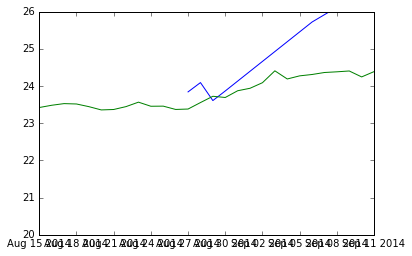

In [50]:
start_date = date(2014, 8, 15)
end_date = date(2014, 9, 11)
a['crushdate'] = pd.date_range(start_date, end_date)

plt.plot(sub_v['crushdate'], sub_v['avg_brix'])
plt.plot(a['crushdate'], a_brix)
plt.ylim(20, 26)

(20, 26)

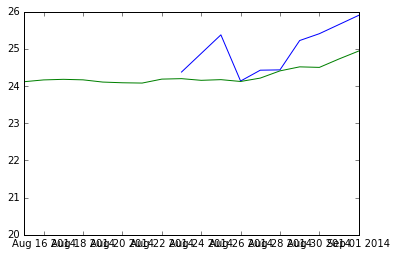

In [38]:
start_date = date(2014, 8, 15)
end_date = date(2014, 9, 1)
a['crushdate'] = pd.date_range(start_date, end_date)

plt.plot(sub_v['crushdate'], sub_v['avg_brix'])
plt.plot(a['crushdate'], a_brix)
plt.ylim(20, 26)

## Sparse regression

In [26]:
'''
model = Lasso(alpha=0.001, max_iter=4000)
model.fit(X_train, y_train)
print('Training R^2 score: ', model.score(X_train, y_train))
print('Test R^2 score: ', model.score(X_test, y_test))

# calculate mean absolute error for training set
y_pred = model.predict(X_test)
print('Mean absolute error: ', abs(y_test - y_pred).mean())
print('Mean absolute percentage error: ', (abs(y_test - y_pred) / y_test).mean())

coef = pd.DataFrame(columns=['feature', 'coef'])
coef['feature'] = X_train.columns.tolist()
coef['coef'] = model.coef_
coef['abs_coef'] = coef['coef'].apply(abs)

print('Intercept: ', model.intercept_)

coef = coef.sort_values('abs_coef', ascending=False)
coef[['feature', 'coef']].head(30)
'''

''

## Gradient boosting regressor

In [33]:
'''
model = GradientBoostingRegressor(loss='huber', learning_rate=0.01, n_estimators=50, max_features=None, max_depth=30)
model.fit(X_train, y_train)
print('Training R^2 score: ', model.score(X_train, y_train))
print('Test R^2 score: ', model.score(X_test, y_test))

# calculate mean absolute error for training set
y_pred = model.predict(X_test)
print('Mean absolute error: ', abs(y_test - y_pred).mean())
print('Mean absolute percentage error: ', (abs(y_test - y_pred) / y).mean())

importance = pd.DataFrame(columns=['feature', 'importance'])
importance['feature'] = X.columns.tolist()
importance['importance'] = model.feature_importances_

importance = importance.sort_values('importance', ascending=False)
importance.head(30)
'''

Training R^2 score:  0.623425531388
Test R^2 score:  0.440350144241


# Try Sparse Regression with CVXPY

In [62]:
import cvxpy as cv

In [131]:
# Define parameter
x = np.asmatrix(X_train)
y = np.asmatrix(y_train).T

x_test = np.asmatrix(X_test)
y_test = np.asmatrix(y_test).T

In [302]:
# Define variable w, the coefficient of each feature
alpha_1 = 0.1
alpha_2 = 5
w = cv.Variable(x.shape[1])

# Define constraints and objective
constraints = [w[:814] > 0]
obj = cv.Minimize(cv.sum_entries(cv.huber(x * w - y)) + alpha_1 * cv.norm(w[814:], 1) + alpha_2 * cv.norm(w[:814], 1))

# Solve problem
prob = cv.Problem(obj, constraints)
prob.solve()
print('objective value: ', prob.value)
print('status:', prob.status)
    
y_pred = x_test * w.value
mae = abs(y_pred - y_test).mean()
print(mae)

objective value:  4847.151975917484
status: optimal
1.55253881066


In [303]:
features = pd.DataFrame(columns=['feature', 'coef'])
features['feature'] = X_train.columns.tolist()
features['coef'] = w.value
features['coef_abs'] = abs(features['coef'])
features = features.sort_values('coef_abs', ascending=False)
features[['feature', 'coef']].head(10)

,feature,coef
844,intercept,20.948827
877,yearly_elnino_aso,6.044463
885,yearly_elnino_ndj,5.871915
887,yearly_elnino_son,-5.237074
878,yearly_elnino_djf,-4.876232
880,yearly_elnino_jas,-4.160372
879,yearly_elnino_fma,3.078733
825,five_month_before_ddays50,-2.930023
870,yearly_ddays50_1,2.895354
826,five_month_before_ddays50_97,2.575001


In [304]:
features['is_pblk'] = features['feature'].apply(lambda x: 1 if 'pblk' in x else 0)
features['is_tier'] = features['feature'].apply(lambda x: 1 if 'tier' in x else 0)
features['is_origin'] = features['feature'].apply(lambda x: 1 if 'origin' in x else 0)
features['is_yearly'] = features['feature'].apply(lambda x: 1 if 'yearly' in x else 0)
features.set_value(0, 'is_pblk', 1)
features.set_value(1, 'is_pblk', 1);

In [305]:
sub = features[(features['is_pblk'] != 1) & (features['is_tier'] != 1) & (features['is_yearly'] != 1) & (features['is_origin'] != 1)]
sub.head(5)

,feature,coef,coef_abs,is_pblk,is_tier,is_origin,is_yearly
844,intercept,20.948827,20.948827,0,0,0,0
825,five_month_before_ddays50,-2.930023,2.930023,0,0,0,0
826,five_month_before_ddays50_97,2.575001,2.575001,0,0,0,0
846,long,1.422482,1.422482,0,0,0,0
835,four_month_before_ddays50,0.967125,0.967125,0,0,0,0
840,four_month_before_meantemp,-0.736073,0.736073,0,0,0,0
836,four_month_before_ddays50_97,-0.617119,0.617119,0,0,0,0
845,lat,-0.385308,0.385308,0,0,0,0
839,four_month_before_maxtemp,0.318593,0.318593,0,0,0,0
827,five_month_before_ddays97,0.201452,0.201452,0,0,0,0


In [306]:
count = X_train[X_train.columns.tolist()[:814]].astype(bool).sum(axis=0).tolist()
sub = features.sort_values('feature').iloc[0:814].copy()
sub['count'] = count
sub = sub.sort_values('coef', ascending=False)
sub.head(5)

,feature,coef,coef_abs,is_pblk,is_tier,is_origin,is_yearly,count
409,105088TLV,0.108354,0.108354,0,0,0,0,4
737,132979GLC,0.098469,0.098469,0,0,0,0,2
465,111390EJG,0.096684,0.096684,0,0,0,0,2
461,111132TLV,0.096560,0.096560,0,0,0,0,1
408,105088SVL,0.095780,0.095780,0,0,0,0,3
464,111315VAL,0.094114,0.094114,0,0,0,0,1
533,112094FRU,0.092649,0.092649,0,0,0,0,4
185,101670VAL,0.091670,0.091670,0,0,0,0,1
414,105205FRU,0.090887,0.090887,0,0,0,0,8
468,111423EJG,0.090039,0.090039,0,0,0,0,5


In [307]:
X_train.columns.tolist()[44]

'100966OAK'

In [308]:
w.value[44]

matrix([[ 0.01742647]])

In [309]:
np.asmatrix(X_test[X_test['100966OAK'] > 0].iloc[0][814:]) * w.value[814:]

matrix([[ 21.91751143]])

We want to fit one line to all the points in one pblk for one tier across all years. To do that, we first generate sets training data.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
all_train = v[v['year'] != 2014]
test = v[v['year'] == 2014]

for one pblk, one tier in one year, we have a row vector $a$ that describe the year (34 elements)
we construct a column vector $w$ with 37 element such that $aw$ is the slope of the line.

In [226]:
groups = all_train.groupby(['pblk', 'tier', 'year'])

loss = None
all_year = []
all_x = []
all_y = []
all_center = []
all_title = []
loss = []
w = cv.Variable(35)

for key, df in groups:
    all_center.append((df['avg_brix'].mean(), df['time_diff'].mean()))
    all_year.append(np.asmatrix(df.iloc[0][4:-1]))
    #a = year * w
    all_y.append(np.asmatrix(df['avg_brix']).T)
    all_x.append(np.asmatrix(df['time_diff']).T)
    all_title.append(key)
    #loss += cv.sum_entries(y - center[0] - a * (x - cneter[1]))

constraints = []
for i in range(len(all_x)):
    constraints.append(all_year[i] * w > 0)
    
# loss function
for i in range(len(all_x)):
    loss.append(cv.sum_entries(cv.huber((all_y[i] - all_center[i][0]) - all_year[i] * w * (all_x[i] - all_center[i][1]))))
    
obj = cv.Minimize(sum(loss))

# Solve problem
prob = cv.Problem(obj, constraints)
prob.solve()
print('objective value: ', prob.value)
print('status:', prob.status)

objective value:  862.4684756111138
status: optimal


In [227]:
# calculate mean absolute error
mae = 0
for i in range(len(all_x)):
    mae += sum(abs(all_y[i] - all_center[i][0] - float(all_year[i] * w.value) * (all_x[i] - all_center[i][1])))
print('mean absolute error:', float(mae / all_train.shape[0]))

mean absolute error: 0.26694555998837033


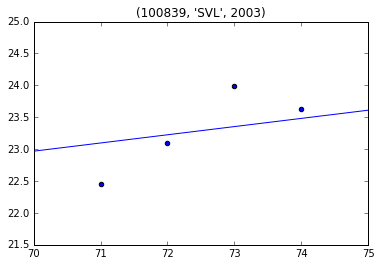

In [233]:
# plot fitted line on training set
# i = 20 (bad), 100, 151, 1, 2000
i = 100

a = all_year[i] * w.value
x = all_center[i][1]
y = all_center[i][0]
plt.plot([x - 10, x + 10], [float(y - 10 * a), float(y + 10 * a)])
plt.scatter(all_x[i], all_y[i])
plt.xlim(min(all_x[i]) - 1, max(all_x[i]) + 1)
plt.title(all_title[i])

In [234]:
groups_test = test.groupby(['pblk', 'tier', 'year'])
all_year_test = []
all_x_test = []
all_y_test = []
all_center_test = []
all_title_test = []

for key, df in groups_test:
    all_center_test.append((df['avg_brix'].mean(), df['time_diff'].mean()))
    all_year_test.append(np.asmatrix(df.iloc[0][4:-1]))
    #a = year * w
    all_y_test.append(np.asmatrix(df['avg_brix']).T)
    all_x_test.append(np.asmatrix(df['time_diff']).T)
    all_title_test.append(key)

In [235]:
# calculate mean absolute error on test set
mae = 0
for i in range(len(all_x_test)):
    mae += sum(abs(all_y_test[i] - all_center_test[i][0] - float(all_year_test[i] * w.value) * (all_x_test[i] - all_center_test[i][1])))
print('mean absolute error:', float(mae / test.shape[0]))

mean absolute error: 0.29010287324454564


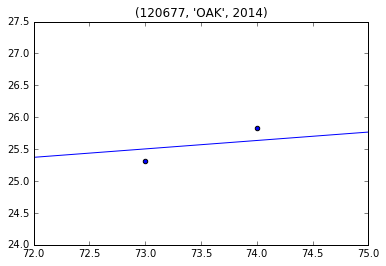

In [236]:
# Plot line on test set
# i = 0, 110, 115
i = 115

a = all_year_test[i] * w.value
x = all_center_test[i][1]
y = all_center_test[i][0]
plt.plot([x - 10, x + 10], [float(y - 10 * a), float(y + 10 * a)])
plt.scatter(all_x_test[i], all_y_test[i])
plt.xlim(min(all_x_test[i]) - 1, max(all_x_test[i]) + 1)
plt.title(all_title_test[i])

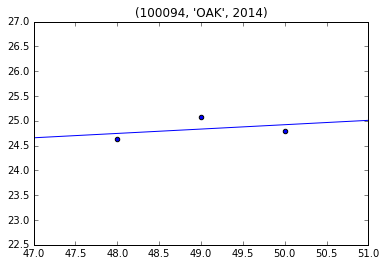

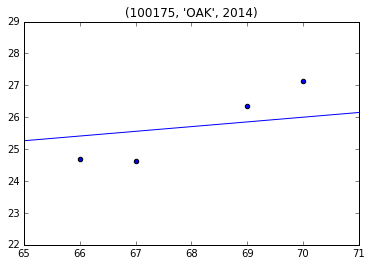

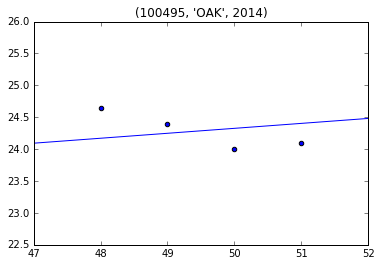

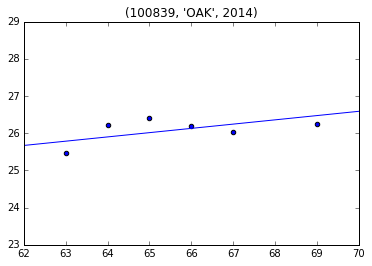

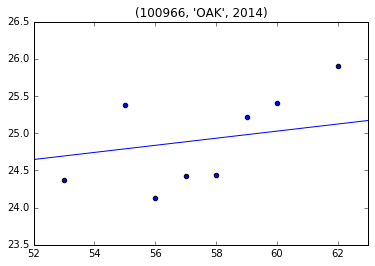

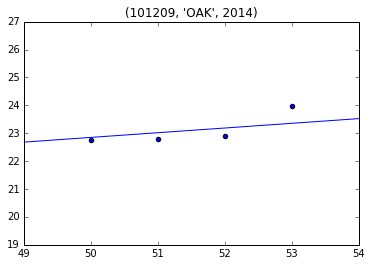

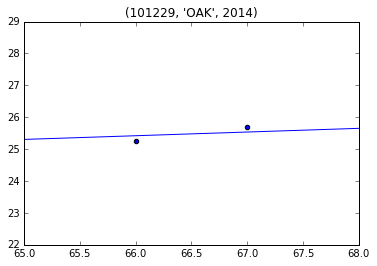

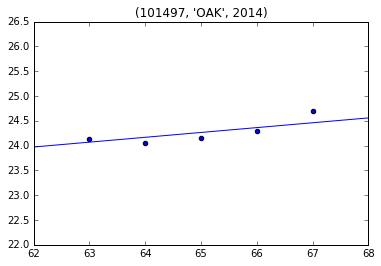

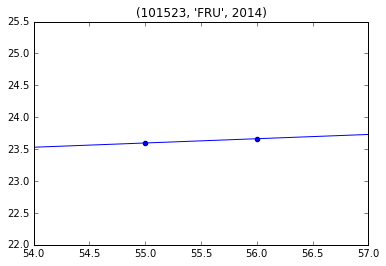

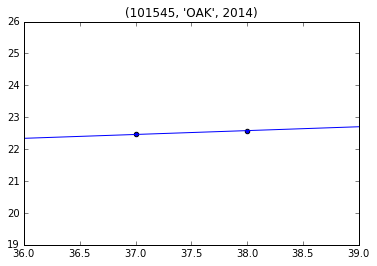

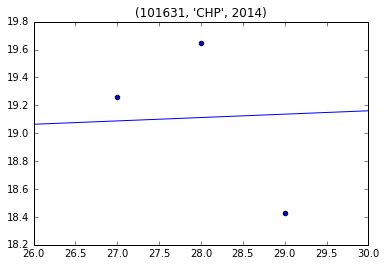

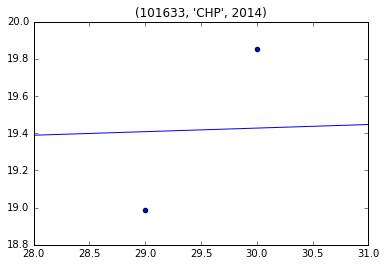

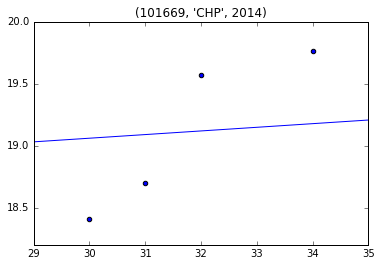

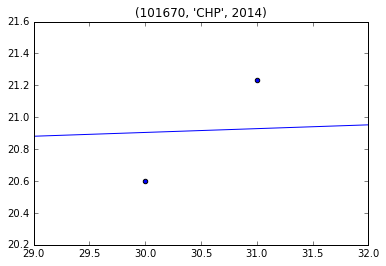

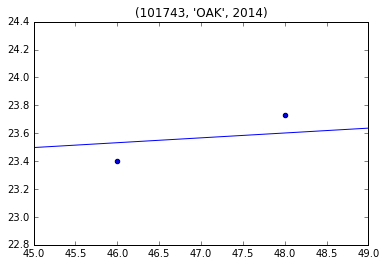

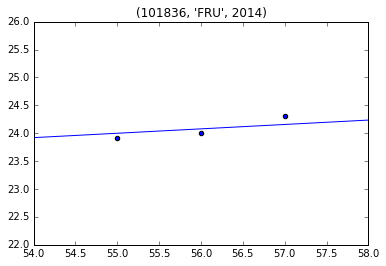

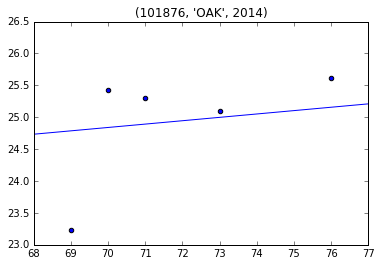

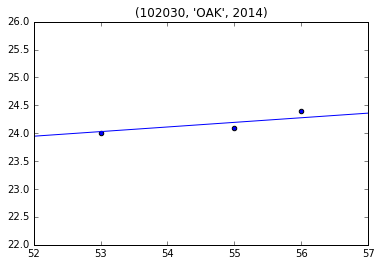

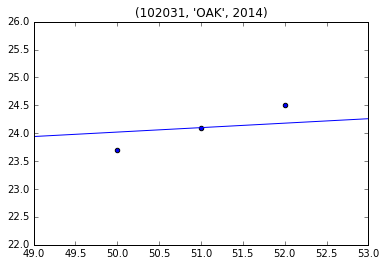

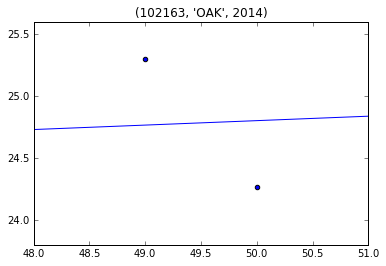

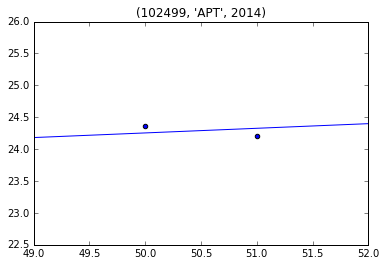

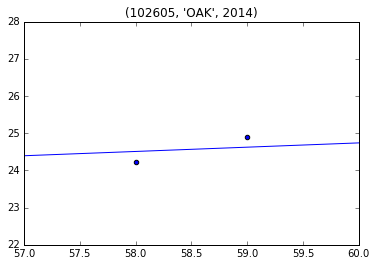

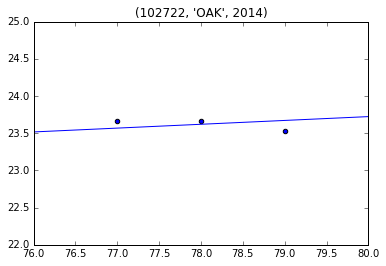

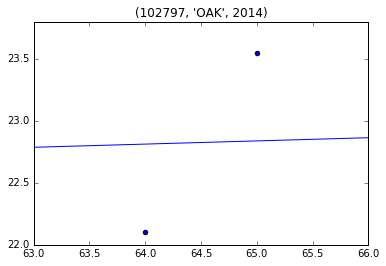

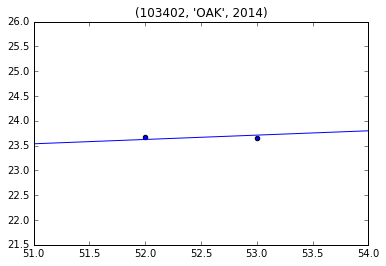

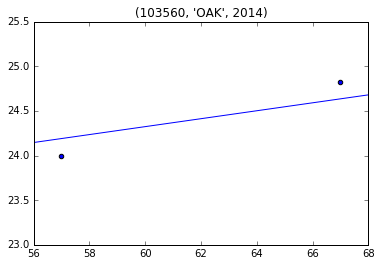

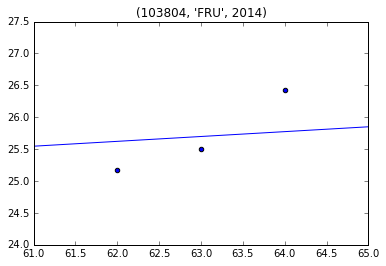

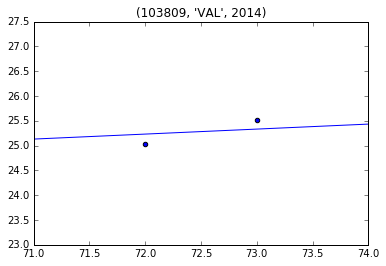

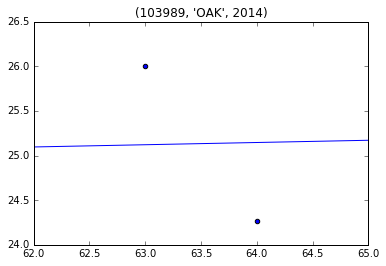

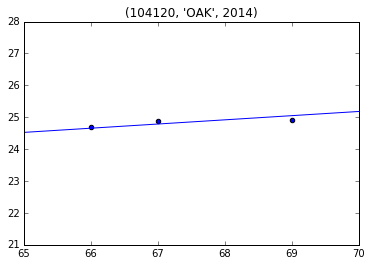

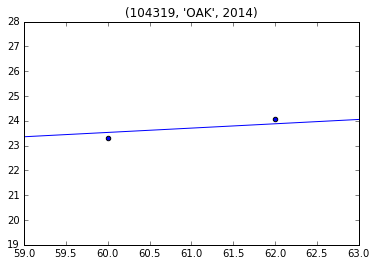

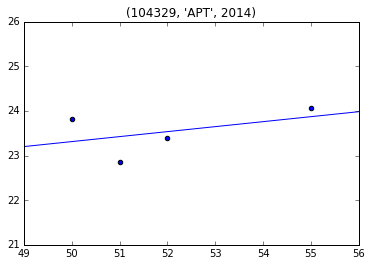

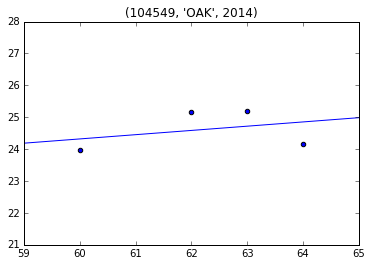

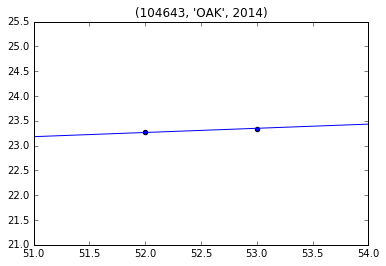

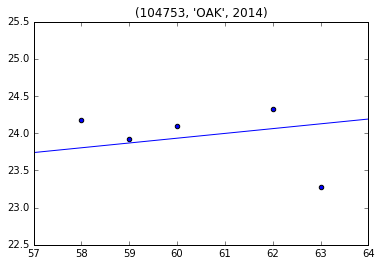

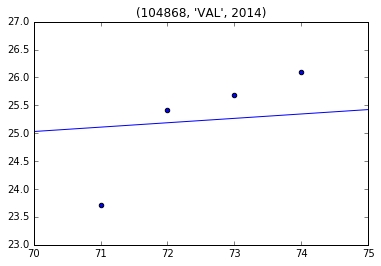

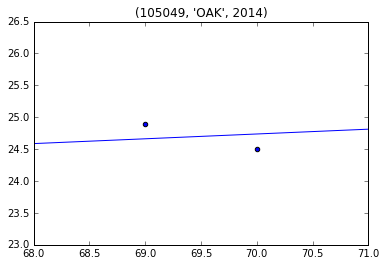

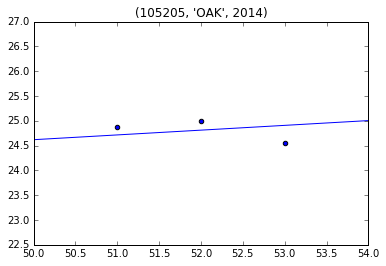

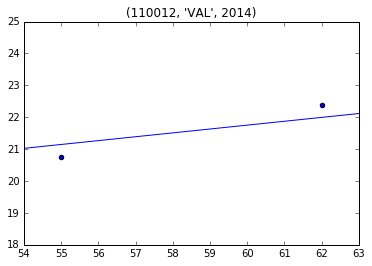

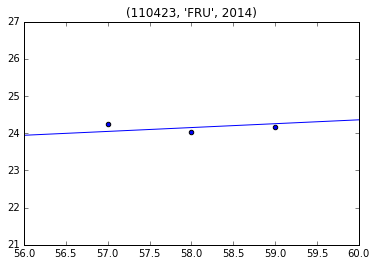

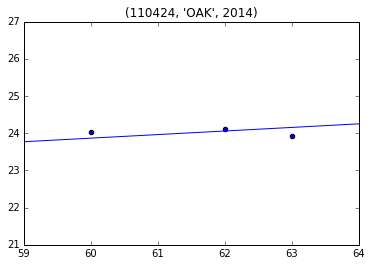

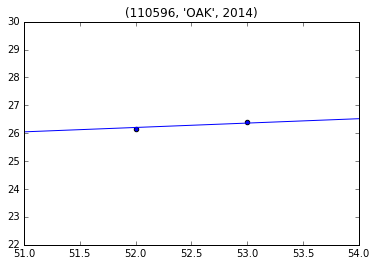

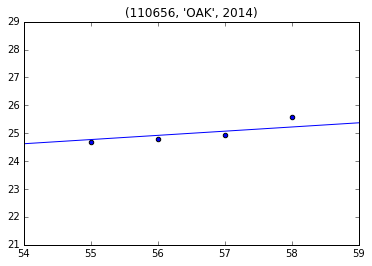

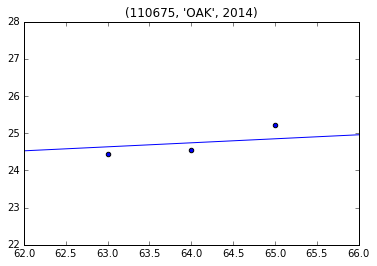

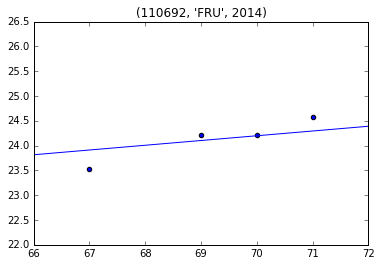

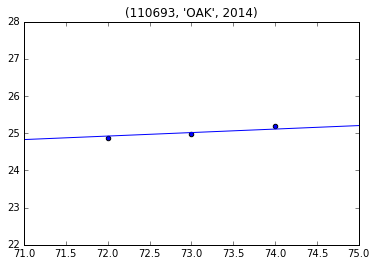

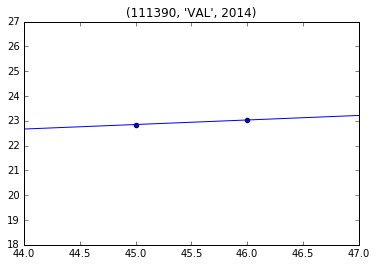

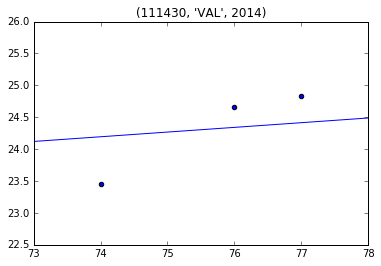

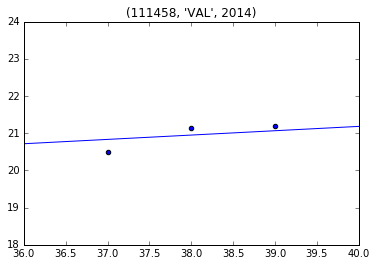

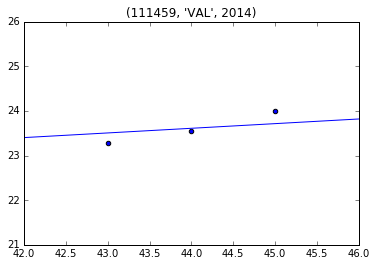

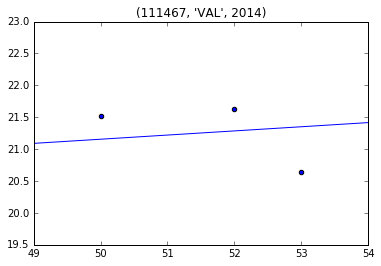

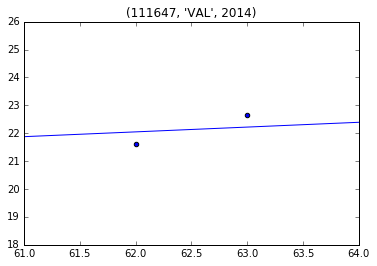

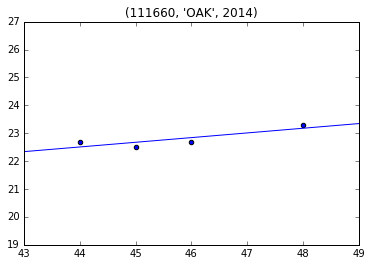

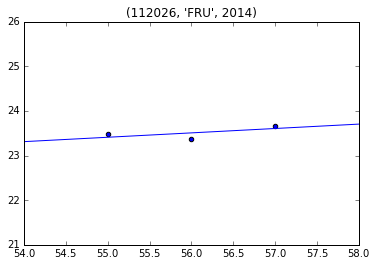

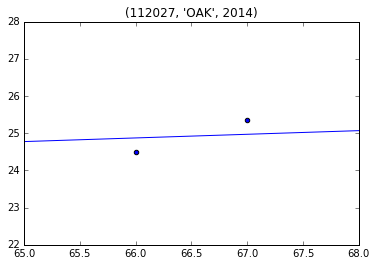

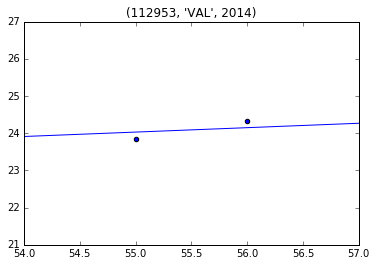

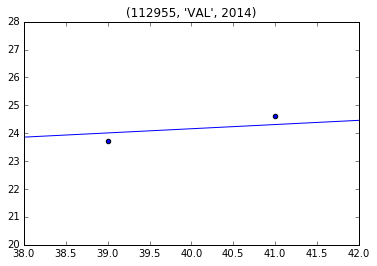

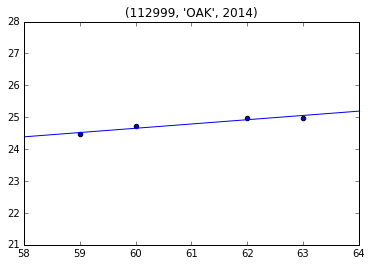

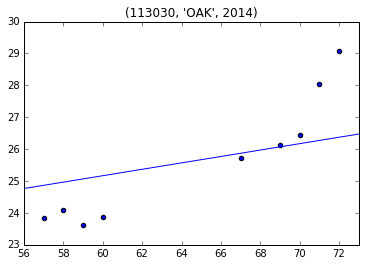

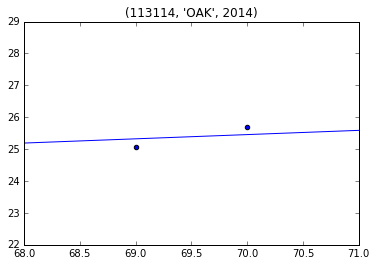

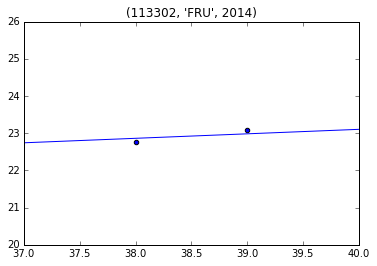

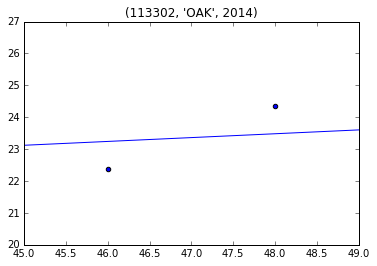

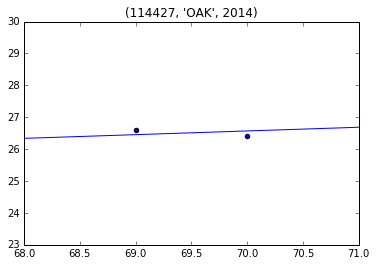

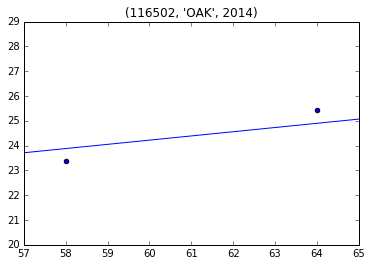

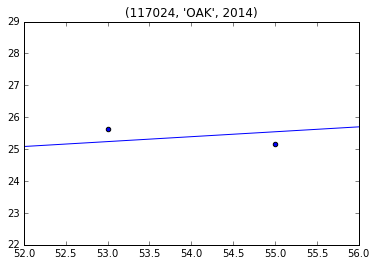

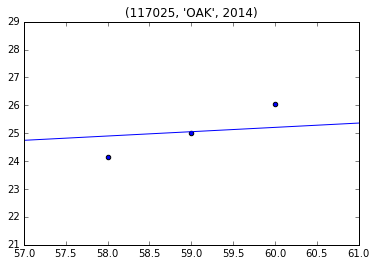

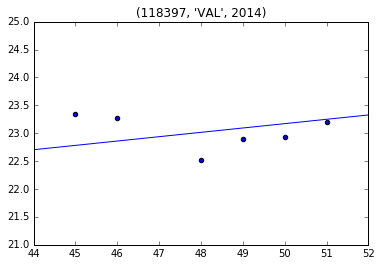

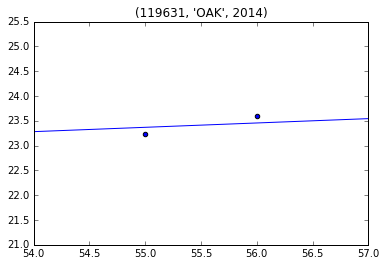

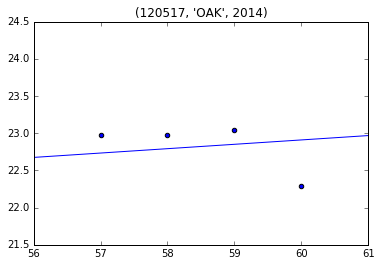

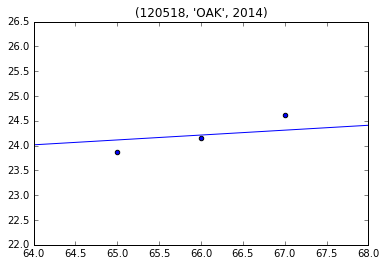

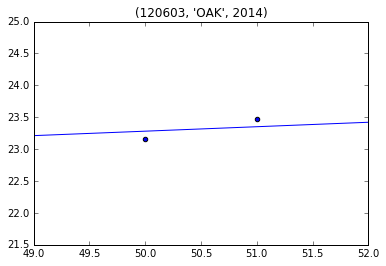

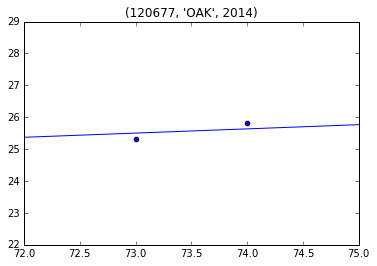

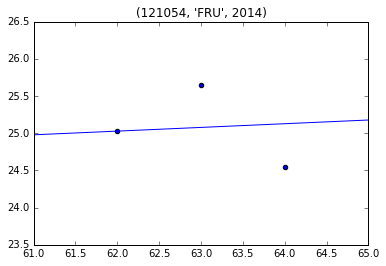

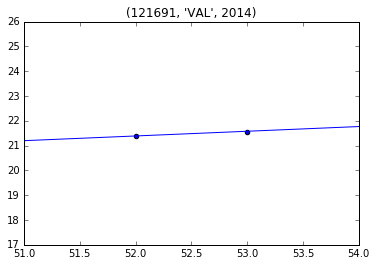

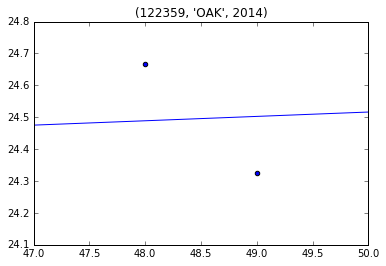

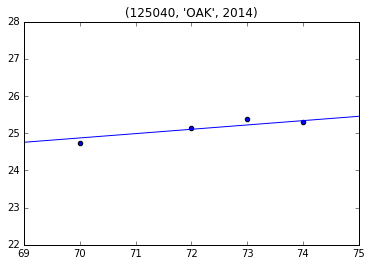

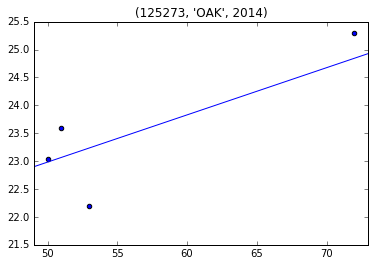

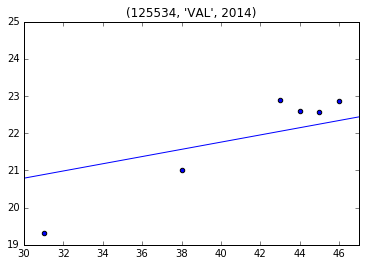

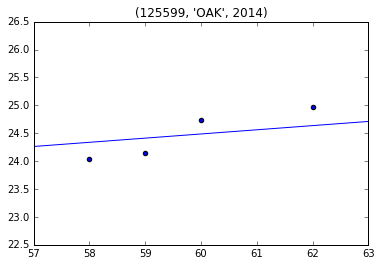

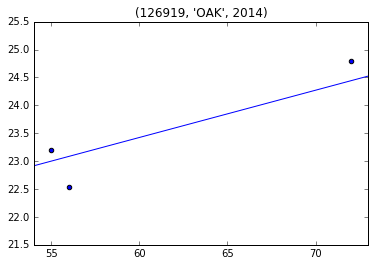

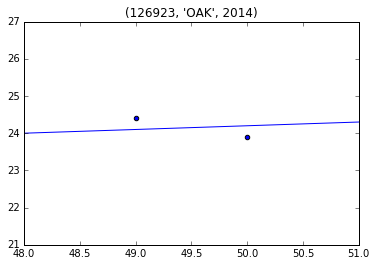

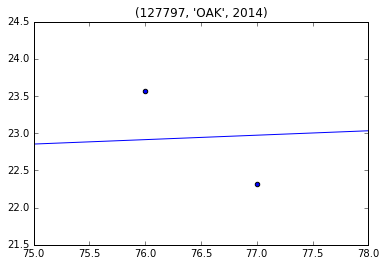

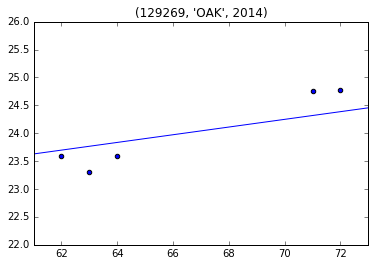

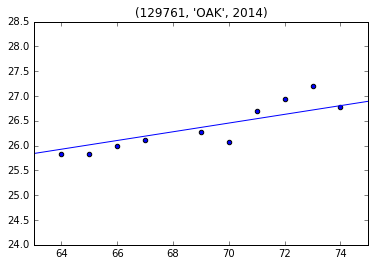

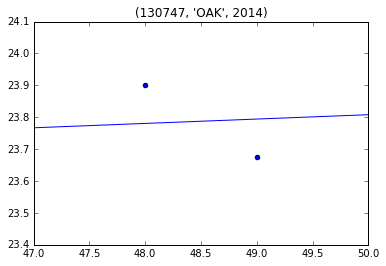

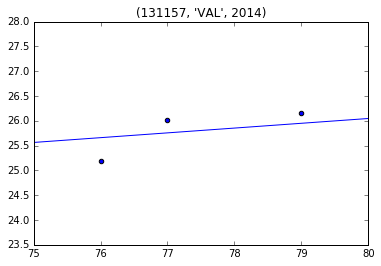

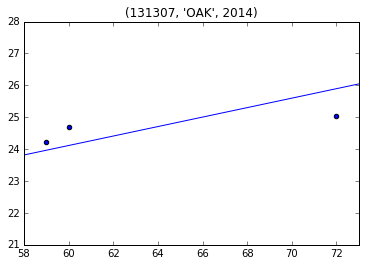

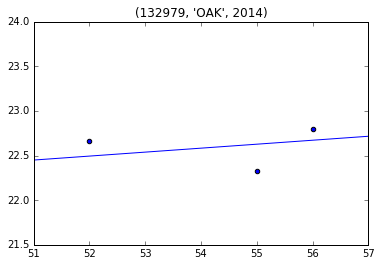

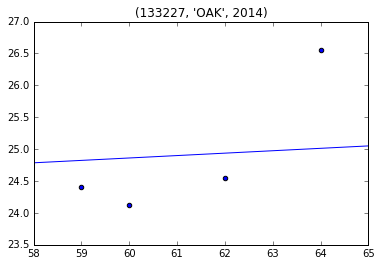

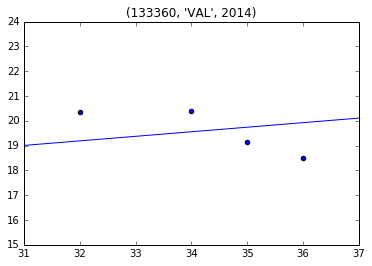

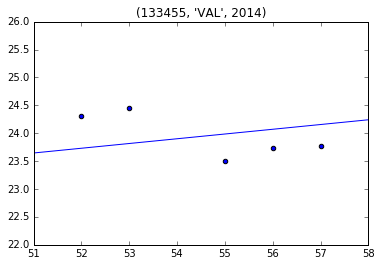

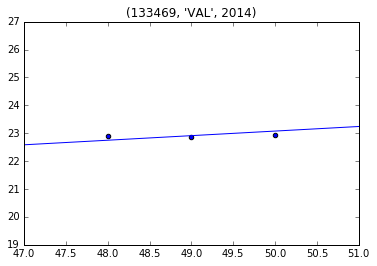

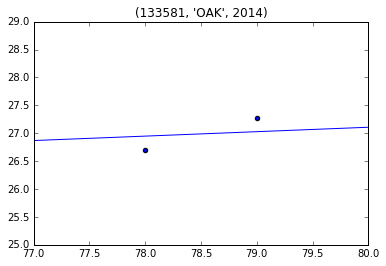

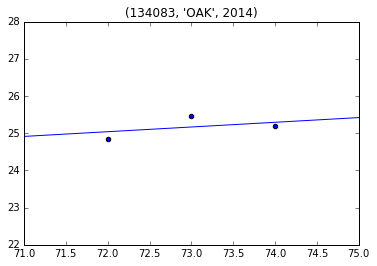

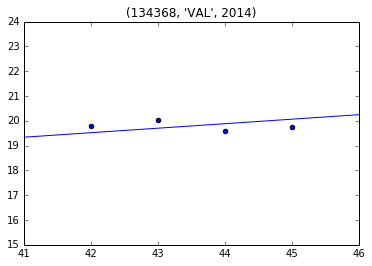

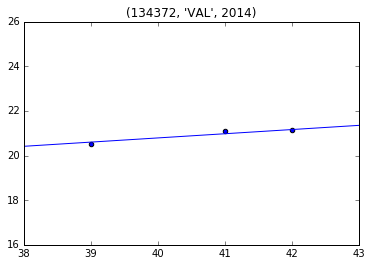

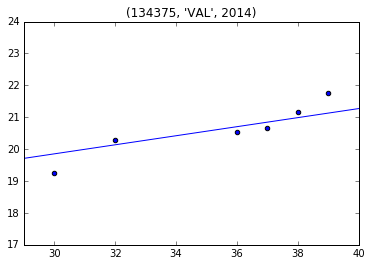

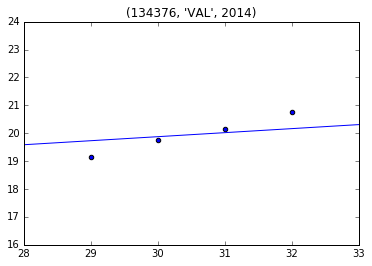

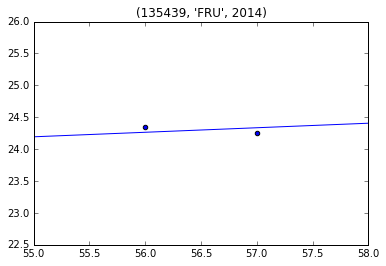

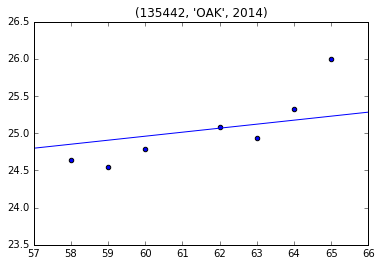

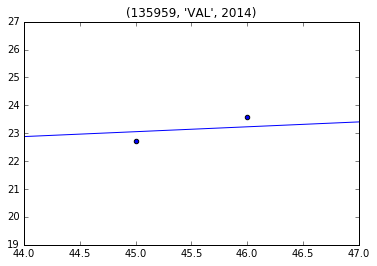

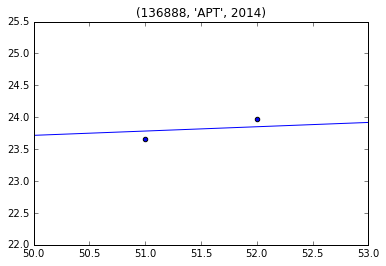

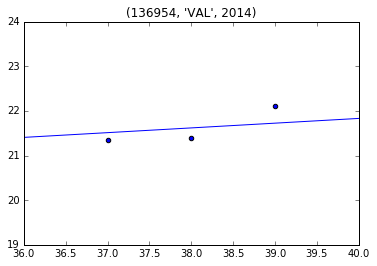

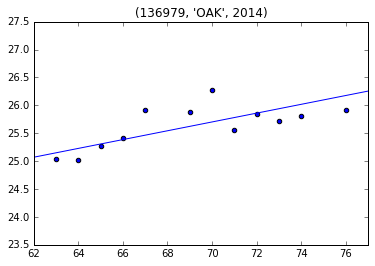

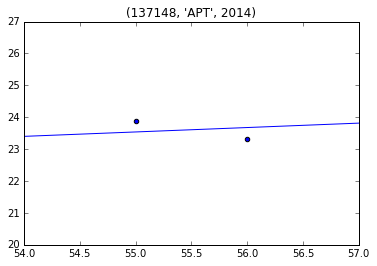

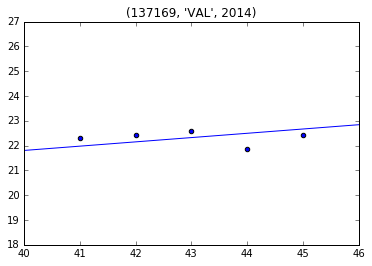

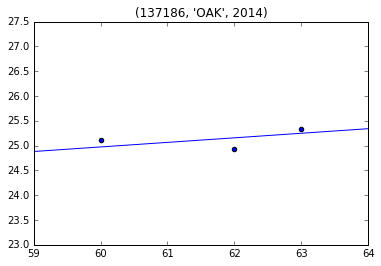

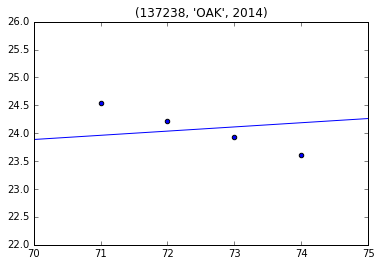

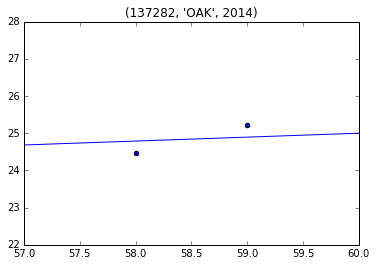

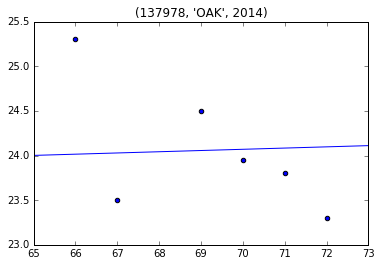

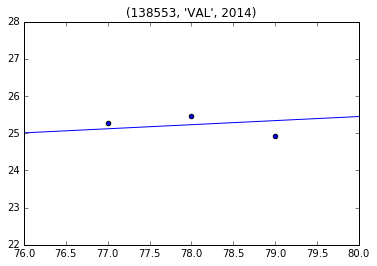

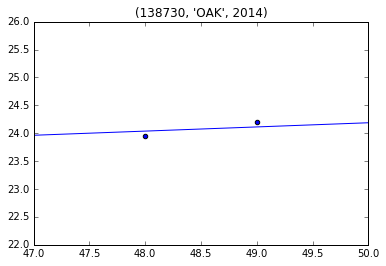

In [237]:
for i in range(len(all_x_test)):
    if len(all_x_test[i]) > 1:
        a = all_year_test[i] * w.value
        x = all_center_test[i][1]
        y = all_center_test[i][0]
        plt.plot([x - 20, x + 20], [float(y - 20 * a), float(y + 20 * a)])
        plt.scatter(all_x_test[i], all_y_test[i])
        plt.xlim(min(all_x_test[i]) - 1, max(all_x_test[i]) + 1)
        plt.title(all_title_test[i])
        plt.show()